In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
df_anz2 = pd.read_excel("/Users/Manan/ANZ_Virtual_Internship/ANZ synthesised transaction dataset.xlsx")
df_anz2.head(7)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit


In [4]:
df_anz.shape  #12043 rows and 23 columns

(12043, 23)

In [5]:
df_anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
df_anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

# Now let's check for null values in data

In [7]:
df_anz.isnull().any()  #so, we can see some null values in various columns

status               False
card_present_flag     True
bpay_biller_code      True
account              False
currency             False
long_lat             False
txn_description      False
merchant_id           True
merchant_code         True
first_name           False
balance              False
date                 False
gender               False
age                  False
merchant_suburb       True
merchant_state        True
extraction           False
amount               False
transaction_id       False
country              False
customer_id          False
merchant_long_lat     True
movement             False
dtype: bool

In [8]:
df_anz.isnull().sum() #merchant code and bpay_biller_code has about 95% null values, so it's good to remove this column

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [10]:
df_anz = df_anz.drop(labels=['bpay_biller_code','merchant_code'],axis=1)

In [12]:
df_anz.isnull().sum()  # No need to fill null vaules, as this will be no use for analysis 

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df_anz['card_present_flag']=imputer.fit_transform(df_anz[['card_present_flag']])

# Now to detect outliers and treat them

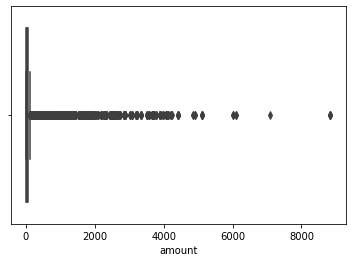

In [29]:
sb.boxplot(df_anz['amount'])  #too many outliers can be seen

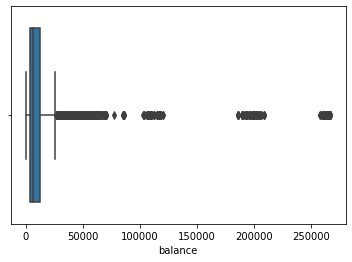

In [32]:
sb.boxplot(df_anz['balance'])

In [35]:
Q1 = df_anz.quantile(0.25)
Q3 = df_anz.quantile(0.75)
IQR = Q3 - Q1                           #detecting outliers
print(IQR)
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

card_present_flag       0.197356
balance              9307.360000
age                    16.000000
amount                 37.655000
dtype: float64
card_present_flag        0.506609
balance             -10802.455000
age                     -2.000000
amount                 -40.482500
dtype: float64 card_present_flag        1.296035
balance              26426.985000
age                     62.000000
amount                 110.137500
dtype: float64


In [ ]:
df_anz = df_anz[df_anz['amount'] < Upper_Whisker]

In [40]:
type(df_anz)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [41]:
#Average transactions amount
average_transaction_amt = df_anz['amount'].sum()/df_anz['amount'].count()

In [45]:
print("Average transaction amount is",average_transaction_amt)

Average transaction amount is 187.93358797641784


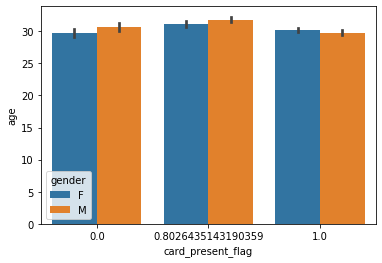

In [49]:
sb.barplot(x = df_anz['card_present_flag'], y = df_anz['age'], hue=df_anz['gender'],data=df_anz)
# both female and male use card for transactions 

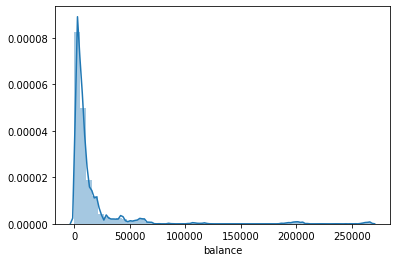

In [46]:
sb.distplot(df_anz['balance'])  #the balance is highly skewed data

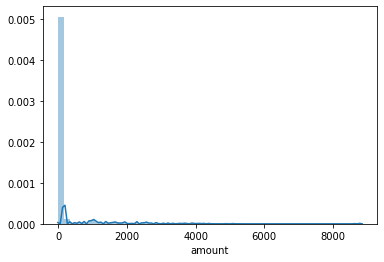

In [47]:
sb.distplot(df_anz['amount']) #max amount transacted is between 0 to 100 dollars

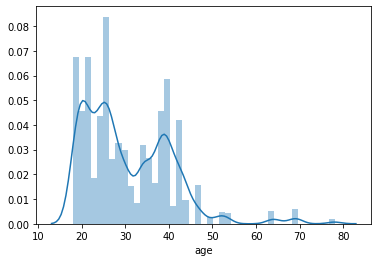

In [48]:
sb.distplot(df_anz['age'])   #the average customer is between 20 to 45 years of age.

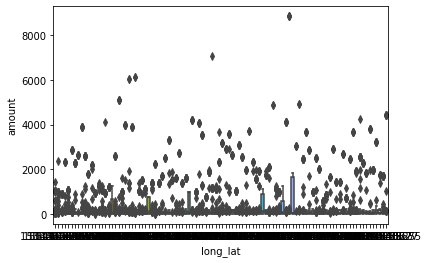

In [55]:
sb.boxplot(df_anz['long_lat'],df_anz['amount'])

In [59]:
df_anz['long_lat'].nunique()

100

In [58]:
df_anz['date'].nunique()

91